<a href="https://colab.research.google.com/github/aukkawut/DS2010_FinalProject/blob/main/DS2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and prelim exploration

In [2]:
#import all the libraries
import numpy as np #for matrix manipulation
import pandas as pd #for read csv files and work with dataframe
from sklearn import linear_model #for statistical learning
from sklearn.linear_model import LinearRegression #for statistical leanring
import statsmodels.api as sm #for calculating p value
from scipy import stats #same with previous
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for even more visualization
from datetime import time, date
from sklearn.preprocessing import PowerTransformer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


In [4]:
plt.rcParams["axes.labelsize"] = 15

Write `!wget http://aukkawut.github.io/collections/dataset/fire_preventation_and_supression.csv` to download the dataset.

In [5]:
!wget http://aukkawut.github.io/collections/dataset/fire_preventation_and_supression.csv

--2021-12-06 06:41:46--  http://aukkawut.github.io/collections/dataset/fire_preventation_and_supression.csv
Resolving aukkawut.github.io (aukkawut.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to aukkawut.github.io (aukkawut.github.io)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://aukkawut.info/collections/dataset/fire_preventation_and_supression.csv [following]
--2021-12-06 06:41:46--  https://aukkawut.info/collections/dataset/fire_preventation_and_supression.csv
Resolving aukkawut.info (aukkawut.info)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to aukkawut.info (aukkawut.info)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3284 (3.2K) [text/csv]
Saving to: ‘fire_preventation_and_supression.csv’

fire_preventation_a 100%[===================>]   3.21K  --.-KB/s    in 0s      

2021-12-06 06:41:47 (51.0 MB/s) - ‘fire_pr

In [6]:
#read the dataset
data = pd.read_csv('fire_preventation_and_supression.csv',thousands=',')
data = data.tail(10) #crop out only 2011-2020
#convert format to workable format
data['ForestService'] = data.ForestService.replace('[\$\,\.]',"",regex=True).astype(int)
data['DOIAgencies'] = data.DOIAgencies.replace('[\$\,\.]',"",regex=True).astype(int)
data['Total'] = data.Total.replace('[\$\,\.]',"",regex=True).astype(int)
data['Preventation'] = data.Preventation.replace('[\$\,\.]',"",regex=True).astype(int)
data['New total'] = data['New total'].replace('[\$\,\.]',"",regex=True).astype(int)


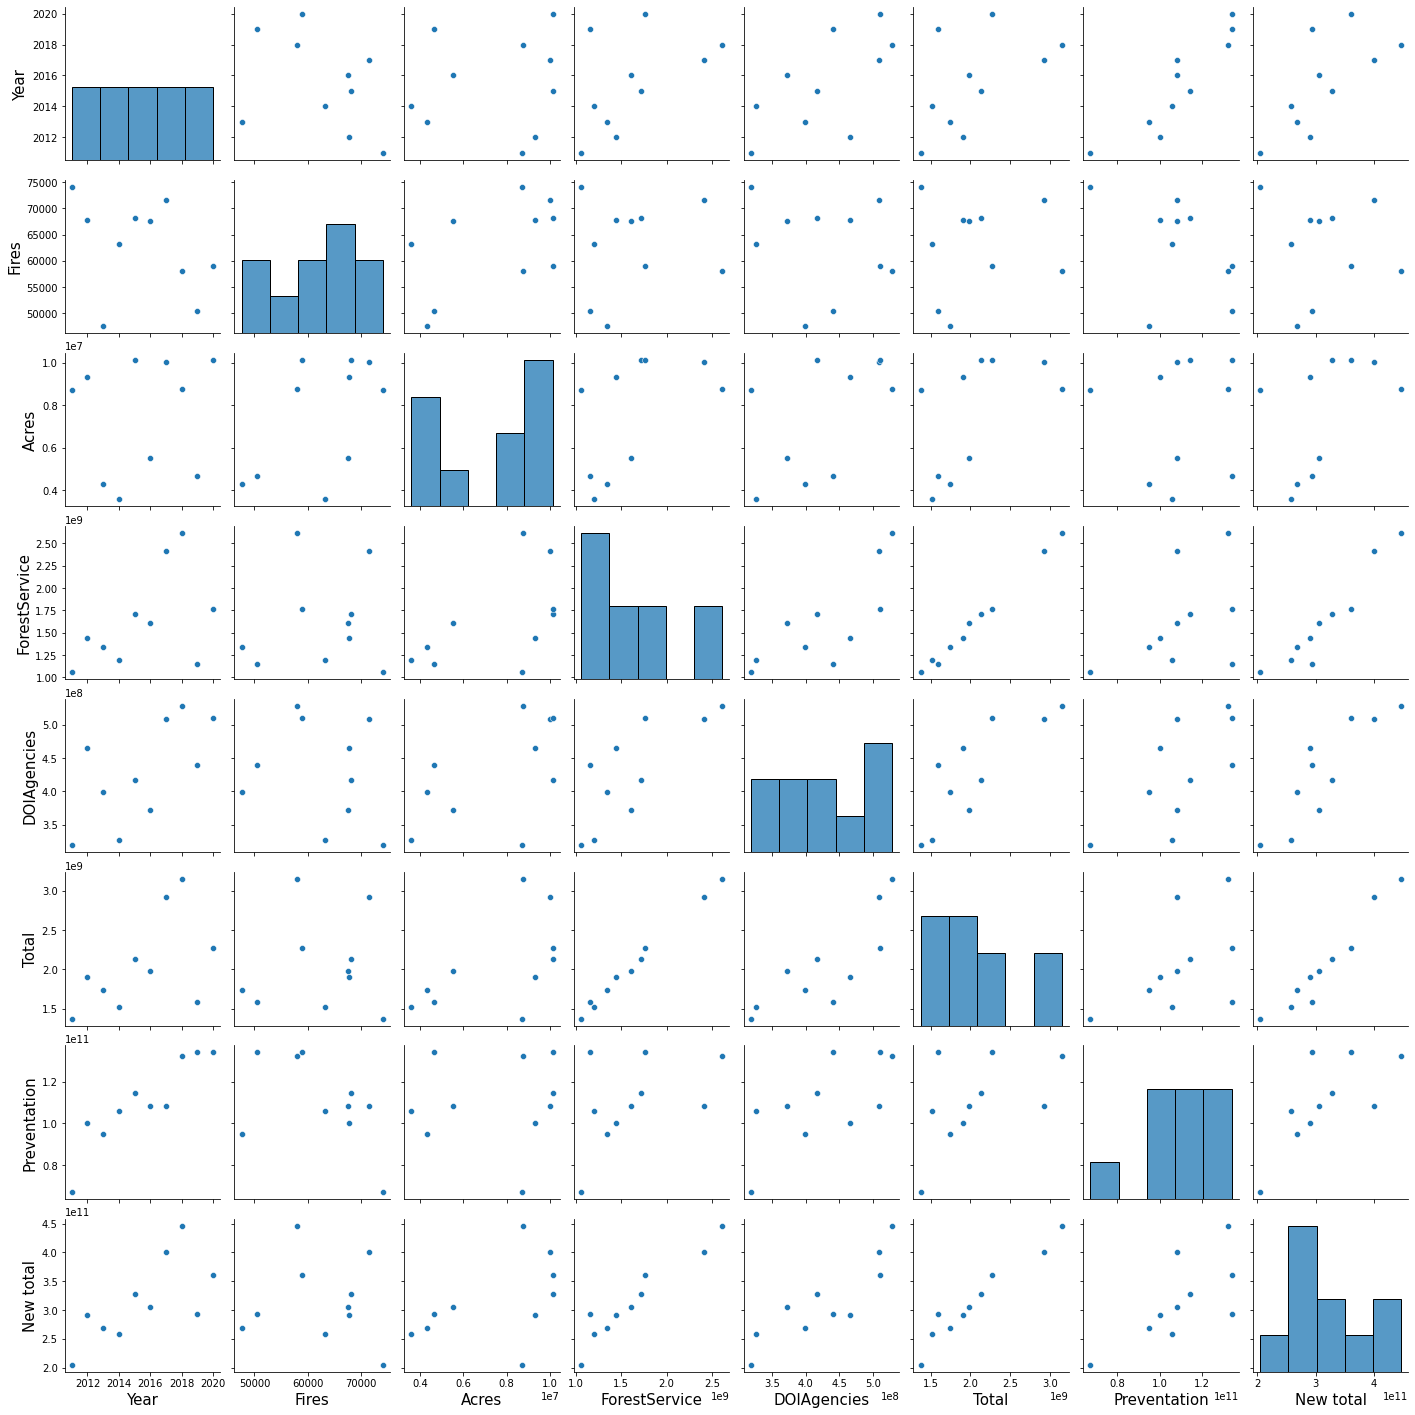

In [7]:
sns.pairplot(data)

In [47]:
data2 = data[['ForestService', 'DOIAgencies','Preventation']]

In [9]:
data2

,ForestService,DOIAgencies,Preventation
26,1055736000,318789000,67370000000
27,1436614000,465832000,100440000000
28,1341735000,399199000,94850000000
29,1195955000,326194000,105760000000
30,1713000000,417543000,114580000000
31,1603806000,371739000,108260000000
32,2410165000,508000000,108260000000
33,2615256000,528000000,132350000000
34,1150000000,440000000,133960000000
35,1764000000,510000000,133960000000


In [ ]:
import statsmodels.api as sm
from scipy import stats

In [11]:
Y = data.Acres.to_list()

In [13]:
Y2 = data.Fires.to_list()

In [12]:
X2 = sm.add_constant(data2)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     2.233
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.185
Time:                        06:47:40   Log-Likelihood:                -157.87
No. Observations:                  10   AIC:                             323.7
Df Residuals:                       6   BIC:                             325.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.786e+06   4.75e+06      0.376

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [14]:
X2 = sm.add_constant(data2)
est = sm.OLS(Y2, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.308
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.356
Time:                        06:58:24   Log-Likelihood:                -102.00
No. Observations:                  10   AIC:                             212.0
Df Residuals:                       6   BIC:                             213.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.688e+04   1.78e+04      4.883

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [30]:
from sklearn import tree

In [31]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(data2, Y)

In [32]:
from sklearn.tree import export_text

In [36]:
r = export_text(clf, feature_names=['ForestService', 'DOIAgencies','Preventation'])

In [37]:
print(r)

|--- ForestService <= 1658402944.00
|   |--- DOIAgencies <= 452916000.00
|   |   |--- Preventation <= 81109999616.00
|   |   |   |--- value: [8711367.00]
|   |   |--- Preventation >  81109999616.00
|   |   |   |--- ForestService <= 1472770496.00
|   |   |   |   |--- DOIAgencies <= 362696496.00
|   |   |   |   |   |--- value: [3595613.00]
|   |   |   |   |--- DOIAgencies >  362696496.00
|   |   |   |   |   |--- Preventation <= 114404999168.00
|   |   |   |   |   |   |--- value: [4319546.00]
|   |   |   |   |   |--- Preventation >  114404999168.00
|   |   |   |   |   |   |--- value: [4664364.00]
|   |   |   |--- ForestService >  1472770496.00
|   |   |   |   |--- value: [5503538.00]
|   |--- DOIAgencies >  452916000.00
|   |   |--- value: [9326238.00]
|--- ForestService >  1658402944.00
|   |--- ForestService <= 2512710528.00
|   |   |--- ForestService <= 2087082496.00
|   |   |   |--- ForestService <= 1738499968.00
|   |   |   |   |--- value: [10125149.00]
|   |   |   |--- ForestService

In [38]:
import graphviz 

In [48]:
data2= data2/1000000

In [49]:
data2

,ForestService,DOIAgencies,Preventation
26,1055.736,318.789,67370.0
27,1436.614,465.832,100440.0
28,1341.735,399.199,94850.0
29,1195.955,326.194,105760.0
30,1713.000,417.543,114580.0
31,1603.806,371.739,108260.0
32,2410.165,508.000,108260.0
33,2615.256,528.000,132350.0
34,1150.000,440.000,133960.0
35,1764.000,510.000,133960.0


In [51]:
data3 = pt.fit_transform(data2)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [54]:
pt.lambdas_

array([-8.54987419,  1.26752693,  2.12876359])

In [53]:
X2 = sm.add_constant(data3)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     3.358
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0950
Time:                        07:40:01   Log-Likelihood:                -158.26
No. Observations:                  10   AIC:                             322.5
Df Residuals:                       7   BIC:                             323.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.516e+06   6.83e+05     11.008      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


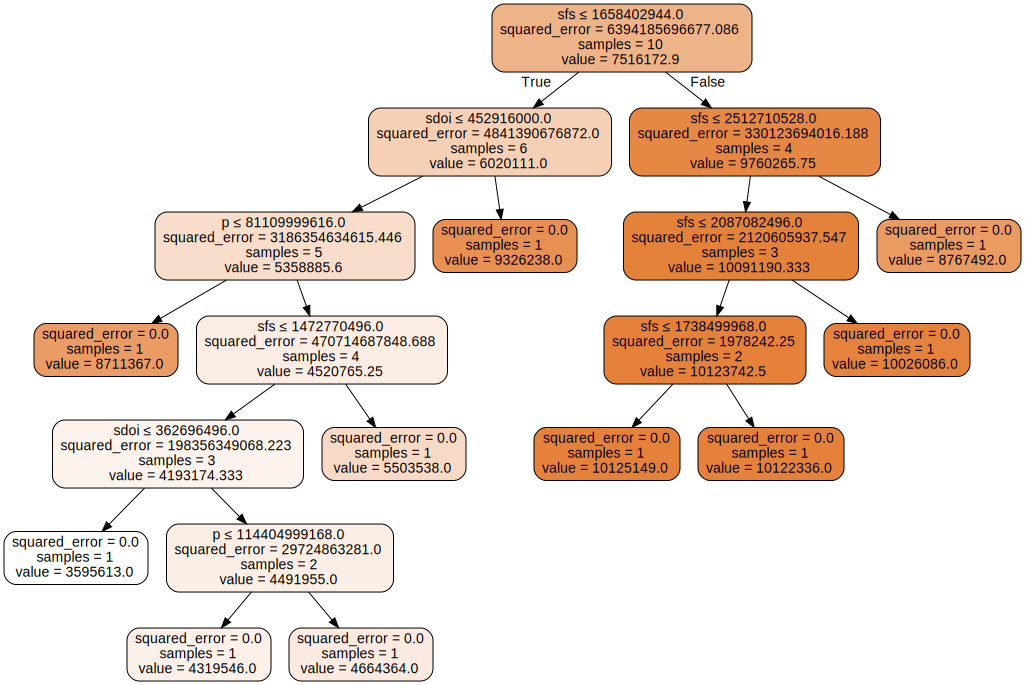

In [42]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['sfs', 'sdoi','p'],   
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 